In [101]:
import pandas as pd
import sqlalchemy as db
from matplotlib import pyplot as plt
import seaborn as sns
import functions as f
import statsmodels.formula.api as smf
import numpy as np

%matplotlib inline

In [102]:
engine = db.create_engine('sqlite:///stocks_formatted.db')

In [103]:
df_prices = pd.read_sql_table('price_close', con=engine)

In [104]:
jaccard_df = pd.read_csv('jaccard.csv')

In [105]:
jaccard_df.drop(columns=['Unnamed: 0'],inplace=True)

clean jaccard scoere table

In [106]:
jaccard_df['Symbol'] = jaccard_df['0'].apply(lambda x: x.split()[0])

In [107]:
jaccard_df['Symbol'] = jaccard_df['Symbol'].apply(lambda x: x[2:-2])

In [108]:
jaccard_df['Year'] = jaccard_df['0'].apply(lambda x: x.split()[1])

In [109]:
jaccard_df['Year'] = jaccard_df['Year'].apply(lambda x: x[:-1])

In [110]:
jaccard_df.drop(columns = ['0'],inplace=True)

In [111]:
jaccard_df.columns = ['jaccard_score', 'symbol', 'year']

In [112]:
jaccard_df.set_index('symbol', inplace=True)

calculate 8 month percentagre change in price from jan

In [113]:
df_prices.set_index('date', inplace=True)
df_prices.drop(columns=['index'], inplace=True)

In [114]:
df_prices.tail()

,MMM,AOS,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AMD,...,WU,WY,WHR,WMB,WYNN,XEL,XRX,XLNX,XYL,YUM
date,,,,,,,,,,,,,,,,,,,,,
2014-01-09,136.45,52.48,39.27,51.22,82.95,18.300,123.50,59.09,113.55,4.09,...,17.06,31.00,159.01,39.25,204.77,27.82,12.05,45.78,34.63,75.05
2014-01-08,136.63,52.15,39.20,50.36,82.15,18.340,110.03,58.90,112.30,4.18,...,17.42,30.82,157.60,39.16,205.29,27.71,12.08,45.91,34.49,76.53
2014-01-07,137.65,52.75,38.85,50.49,81.52,18.315,109.44,58.97,113.18,4.18,...,17.44,31.11,154.58,39.01,201.51,27.82,12.19,45.52,34.51,76.56
2014-01-06,137.63,53.27,39.15,50.39,80.54,18.080,106.28,58.12,111.80,4.13,...,17.06,31.02,154.45,38.40,195.86,27.35,12.09,45.42,34.41,75.50
2014-01-03,138.45,53.31,38.64,52.30,81.40,18.290,108.15,59.16,112.88,4.00,...,16.92,31.34,156.90,38.03,196.00,27.50,11.99,45.62,34.47,75.56


In [115]:
df_returns = f.transform_to_august_returns(df_prices)

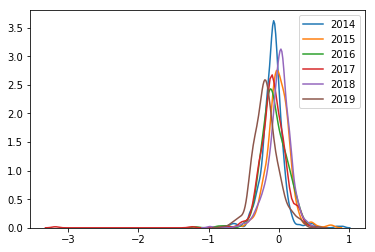

In [116]:
for col in df_returns.columns:
    sns.kdeplot(df_returns[col])

In [117]:
sp_500_df = pd.read_csv('sp500_daily.csv')

In [118]:
sp_500_df.set_index(['Date'], inplace= True)

In [119]:
sp_500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3294850000
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3511750000
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,3652140000
2014-01-09,1839.000000,1843.229980,1830.380005,1838.130005,1838.130005,3581150000


In [120]:
nasdaq = pd.read_csv('csv/NASDAQ.csv')
amex = pd.read_csv('csv/AMEX.csv')
nyse = pd.read_csv('csv/NYSE.csv')

In [121]:
df = pd.concat([nasdaq, amex, nyse])

In [122]:
df.set_index('Symbol', inplace = True)

In [123]:
df.drop(columns = ['LastSale', 'IPOyear', 'Unnamed: 8', 'Summary Quote'], inplace=True)

In [124]:
df.dropna(inplace=True)

In [125]:
df.dtypes

Name         object
MarketCap    object
Sector       object
industry     object
dtype: object

In [126]:
#transform market cap 
df['MarketCap'] = df['MarketCap'].apply(lambda x: x[1:-2])

In [127]:
df.MarketCap = pd.to_numeric(df.MarketCap)

In [128]:
df.MarketCap = np.log(df.MarketCap)

In [129]:
df.MarketCap.head

<bound method NDFrame.head of Symbol
YI       6.013960
PIH      1.098612
PIHPP    2.862201
TURN     4.104295
FLWS     0.182322
BCOW     3.806662
FCCY     5.050497
SRCE     0.095310
VNET     6.781171
TWOU     0.875469
QFIN     0.470004
JOBS     1.547563
JFK      4.298645
JFKKU    3.981549
JFKKW    0.693147
EGHT     0.693147
AAON     0.955511
ABEO     5.351384
ABIL     1.945910
ABMD     2.442347
AXAS     5.193512
ACIU     5.910254
ACIA     0.955511
ACTG     4.935193
ACHC     1.064711
ACAD     1.360977
ACAM     5.918894
ACST     4.699571
AXDX     0.000000
XLRN     0.741937
           ...   
WK       0.993252
INT      0.693147
WWE      1.740466
WP       3.686376
WOR      0.741937
WPP      2.721295
WPX      1.526056
WYND     1.435085
WH       1.774952
XYF      6.245331
XHR      0.875469
XRX      2.066863
XIN      5.548687
XPO      1.609438
XYL      2.667228
AUY      0.693147
YELP     0.993252
YETI     1.029619
YEXT     0.788457
YRD      6.648985
YPF      1.974081
YUMC     2.815409
YUM      

In [130]:
df_returns = df_returns.join(df, how='left')

In [131]:
df_returns = df_returns.join(pd.get_dummies(df_returns.Sector), how='left')

In [132]:
df_returns.head()

,2014,2015,2016,2017,2018,2019,Name,MarketCap,Sector,industry,...,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Health Care,Miscellaneous,Public Utilities,Technology,Transportation
A,-0.023366,0.032051,-0.096092,-0.271886,0.090680,-0.153600,"Agilent Technologies, Inc.",3.139833,Capital Goods,Biotechnology: Laboratory Analytical Instruments,...,0,0,0,0,0,0,0,0,0,0
AAL,-0.652600,0.280282,0.283060,-0.088337,0.276090,-0.012315,"American Airlines Group, Inc.",2.681022,Transportation,Air Freight/Delivery Services,...,0,0,0,0,0,0,0,0,0,1
AAP,-0.191797,-0.025795,-0.079414,0.305920,-0.269677,0.008422,Advance Auto Parts Inc,2.415914,Consumer Services,Other Specialty Stores,...,0,0,1,0,0,0,0,0,0,0
AAPL,0.827129,-0.157962,0.089796,-0.235471,-0.086613,-0.276279,Apple Inc.,6.840547,Technology,Computer Manufacturing,...,0,0,0,0,0,0,0,0,1,0
ABBV,-0.087763,-0.039763,-0.088526,-0.160391,0.053856,0.177407,AbbVie Inc.,4.662495,Health Care,Major Pharmaceuticals,...,0,0,0,0,0,1,0,0,0,0


In [136]:
df = df_returns.join(jaccard_df, how='left')

In [141]:
df.dropna(inplace = True)

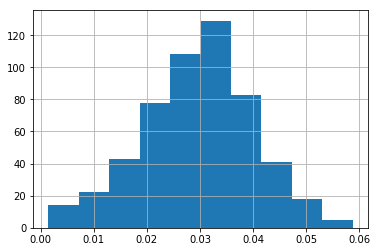

In [145]:
df['jaccard_score'].hist()

In [147]:
df['returns'] = df['2019']

In [148]:
df

,2014,2015,2016,2017,2018,2019,Name,MarketCap,Sector,industry,...,Energy,Finance,Health Care,Miscellaneous,Public Utilities,Technology,Transportation,jaccard_score,year,returns
FB,-0.247503,-0.107839,-0.117100,-0.270152,-0.087862,-0.422465,"Facebook, Inc.",6.360611,Technology,"Computer Software: Programming, Data Processing",...,0,0,0,0,0,1,0,0.031066,2019,-0.422465
FBHS,0.113646,-0.026345,-0.058673,-0.213769,0.223451,-0.491948,"Fortune Brands Home & Security, Inc.",2.028148,Basic Industries,Homebuilding,...,0,0,0,0,0,0,0,0.038371,2018,-0.491948
FBHS,0.113646,-0.026345,-0.058673,-0.213769,0.223451,-0.491948,"Fortune Brands Home & Security, Inc.",2.028148,Basic Industries,Homebuilding,...,0,0,0,0,0,0,0,0.035291,2019,-0.491948
FCX,0.012594,0.218684,-0.732824,0.114659,0.132018,-0.105212,"Freeport-McMoran, Inc.",2.760010,Basic Industries,Precious Metals,...,0,0,0,0,0,0,0,0.008125,2018,-0.105212
FCX,0.012594,0.218684,-0.732824,0.114659,0.132018,-0.105212,"Freeport-McMoran, Inc.",2.760010,Basic Industries,Precious Metals,...,0,0,0,0,0,0,0,0.017146,2019,-0.105212
FDX,-0.088040,0.015309,-0.072579,-0.158125,0.109511,0.001348,FedEx Corporation,3.728100,Transportation,Air Freight/Delivery Services,...,0,0,0,0,0,0,1,0.023673,2018,0.001348
FE,-0.062168,0.163010,-0.115238,0.061066,-0.175211,-0.163943,FirstEnergy Corp.,3.139833,Public Utilities,Electric Utilities: Central,...,0,0,0,0,1,0,0,0.026320,2018,-0.163943
FE,-0.062168,0.163010,-0.115238,0.061066,-0.175211,-0.163943,FirstEnergy Corp.,3.139833,Public Utilities,Electric Utilities: Central,...,0,0,0,0,1,0,0,0.026775,2019,-0.163943
FFIV,-0.274406,0.077265,-0.171154,0.117334,-0.316036,0.081027,"F5 Networks, Inc.",2.128232,Technology,Computer Communications Equipment,...,0,0,0,0,0,1,0,0.046850,2018,0.081027
FIS,-0.033302,0.001442,-0.243532,-0.110029,-0.138741,-0.228138,"Fidelity National Information Services, Inc.",3.713572,Miscellaneous,Business Services,...,0,0,0,1,0,0,0,0.040478,2018,-0.228138


In [149]:
f = 'returns~jaccard_score'
model = smf.ols(f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.08694
Date:                Tue, 16 Jul 2019   Prob (F-statistic):              0.768
Time:                        10:49:19   Log-Likelihood:                 174.54
No. Observations:                 541   AIC:                            -345.1
Df Residuals:                     539   BIC:                            -336.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1786      0.023     -7.855      0.000      -0.223      -0.134
jaccard_score     0.2136      0.724      0.295      0.768      -1.209       1.636
==============================================================================
Omnibus:                       18.074   Durbin-Watson:                   1.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.747
Skew:                           0.279   Prob(JB):                     1.56e-06
Kurtosis:                       3.935   Cond. No.                         96.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""